# Assignment-1 Statistics and Trends 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Reading Dataset - USA Cost of living

In [3]:
data = pd.read_csv("cost_of_living_us.csv")

In [4]:
data.head() # Displaying Sample first 5 records of Data

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


### Exploratory Data Analysis 

In [15]:
data.shape #displaying no. of rows and columns in dataset

(31430, 15)

In [17]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [19]:
# The dataset contains 1,430 entries and 15 columns, with mostly numerical data, 
# some categorical fields, a Boolean column ('isMetro'), and 10 missing values in 'median_family_income'.

In [21]:
data.describe() #Statistical summary of numerical variables in dataset

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [23]:
# Select only the categorical variables from your DataFrame
categorical_df = data.select_dtypes(include=['object','bool'])

# Generate descriptive statistics for categorical variables
categorical_stats = categorical_df.describe()

categorical_stats

,state,isMetro,areaname,county,family_member_count
count,31430,31430,31430,31430,31430
unique,51,2,2561,1877,10
top,TX,False,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,19730,240,300,3143


In [25]:
#Print the duplicated rows
data[data.duplicated(keep=False)] #No Duplicated Rows present in Data

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income


In [27]:
data.isnull().sum() # 10 missing values in column 'median_family_income'

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

In [29]:
# Handling missing data
mn=data['median_family_income'].mean()
med=data['median_family_income'].median()
print(f"Mean is : {mn}")
print(f"Median is : {med}")

Mean is : 68315.99701685332
Median is : 65955.60546875


In [31]:
# Mean adn median are almost Similar

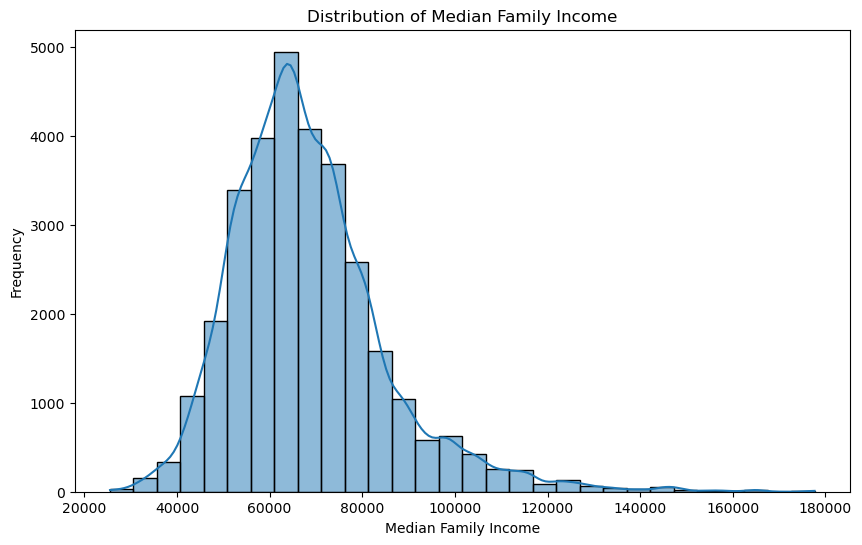

Skew :1.2688780658705154


In [33]:
# Plotting a histogram with a KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(data['median_family_income'], kde=True, bins=30)

# Adding labels and title
plt.title('Distribution of Median Family Income')
plt.xlabel('Median Family Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()
print(f"Skew :{data['median_family_income'].skew()}")

In [34]:
# A longer right tail means that while most of the data is clustered on the left side,
# a small number of extreme values on the right stretch the distribution, which is characteristic of positive skewness.

In [37]:
data['median_family_income'] = data['median_family_income'].fillna(med) #filling null values with median

In [38]:
data.isnull().sum() #no null values

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [41]:
# Display the unique value counts for each categorical column: 'state', 'isMetro', 'areaname', 'county', and 'family_member_count'."

In [43]:
for cat_col in ['state','isMetro','areaname','county','family_member_count']:
    print(f" {data[cat_col].value_counts()}")
    print("________________________________________")

 state
TX    2540
GA    1590
VA    1330
KY    1200
MO    1160
KS    1050
IL    1020
NC    1000
IA     990
TN     950
NE     930
IN     920
OH     880
MN     870
MI     830
MS     820
OK     770
AR     750
WI     720
PA     670
AL     670
FL     670
SD     660
CO     640
LA     640
NY     620
CA     580
MT     560
WV     550
ND     530
SC     460
ID     440
WA     390
OR     360
NM     330
AK     290
UT     290
MD     240
WY     230
NJ     210
NV     170
ME     160
AZ     150
VT     140
MA     140
NH     100
CT      80
RI      50
HI      50
DE      30
DC      10
Name: count, dtype: int64
________________________________________
 isMetro
False    19730
True     11700
Name: count, dtype: int64
________________________________________
 areaname
Atlanta-Sandy Springs-Roswell, GA HUD Metro FMR Area             240
Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area     200
Richmond, VA MSA                                                 170
Virginia Beach-Norfolk-Newport News, VA-NC

In [45]:
data[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost','taxes','median_family_income','total_cost']]


,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,median_family_income,total_cost
0,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,73010.414062,39254.0532
1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,73010.414062,57194.3256
2,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,73010.414062,76141.0308
3,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,73010.414062,94203.5328
4,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,73010.414062,100823.5200
...,...,...,...,...,...,...,...,...,...
31425,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,80177.656250,55415.4672
31426,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,80177.656250,75424.1832
31427,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,80177.656250,96413.1684
31428,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,80177.656250,113294.2260


### Correlation matrix between Numerical Columns

In [48]:
cost_numerical = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost','taxes','median_family_income','total_cost']
cost_corr = data[cost_numerical].corr()
print("Correlation Matrix:")
cost_corr

Correlation Matrix:


,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,median_family_income,total_cost
housing_cost,1.000000,0.577021,0.253291,0.299124,0.914854,0.644778,0.766607,0.584752,0.784998
food_cost,0.577021,1.000000,0.698019,0.814550,0.857673,0.713018,0.474955,0.125043,0.894176
transportation_cost,0.253291,0.698019,1.000000,0.689419,0.504562,0.455550,0.299172,0.077730,0.634592
healthcare_cost,0.299124,0.814550,0.689419,1.000000,0.591030,0.526584,0.335627,-0.070999,0.748550
other_necessities_cost,0.914854,0.857673,0.504562,0.591030,1.000000,0.758449,0.717454,0.429968,0.936292
childcare_cost,0.644778,0.713018,0.455550,0.526584,0.758449,1.000000,0.638053,0.286355,0.880401
taxes,0.766607,0.474955,0.299172,0.335627,0.717454,0.638053,1.000000,0.535881,0.749285
median_family_income,0.584752,0.125043,0.077730,-0.070999,0.429968,0.286355,0.535881,1.000000,0.337097
total_cost,0.784998,0.894176,0.634592,0.748550,0.936292,0.880401,0.749285,0.337097,1.000000


## Data Visualizations 

### 1. Scatter Plot 

In [149]:
def create_scatter_plot(data, x_col, y_col, title="Scatter Plot"):
    """
    Creates a scatter plot to visualize the relationship between two numerical variables.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        title (str, optional): The title of the plot. Defaults to "Scatter Plot".
    """

    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col])
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(False)
    filename = f"Scatter_plot_{x_col}_VS_{y_col}.png"
    plt.savefig(filename)
    plt.show()

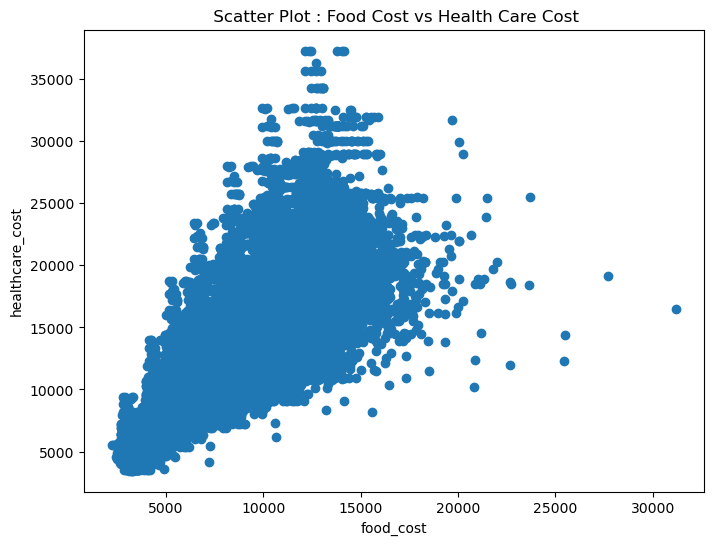

In [153]:
# function call
create_scatter_plot(data, "food_cost", "healthcare_cost", " Scatter Plot : Food Cost vs Health Care Cost")

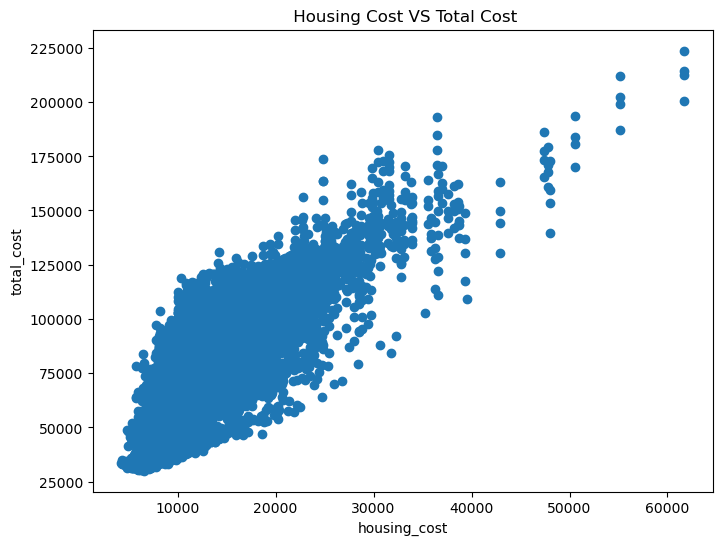

In [155]:
# function call
create_scatter_plot(data, "housing_cost", "total_cost", " Housing Cost VS Total Cost")

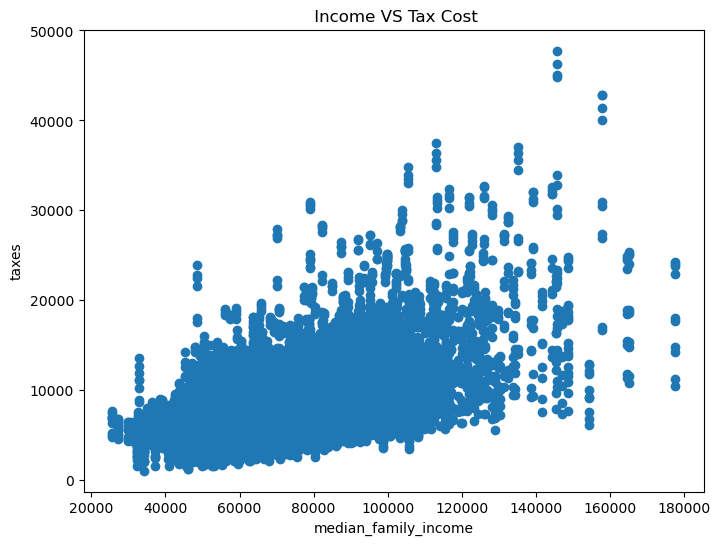

In [156]:
create_scatter_plot(data, "median_family_income", "taxes", " Income VS Tax Cost") # Not Strongly Correlated

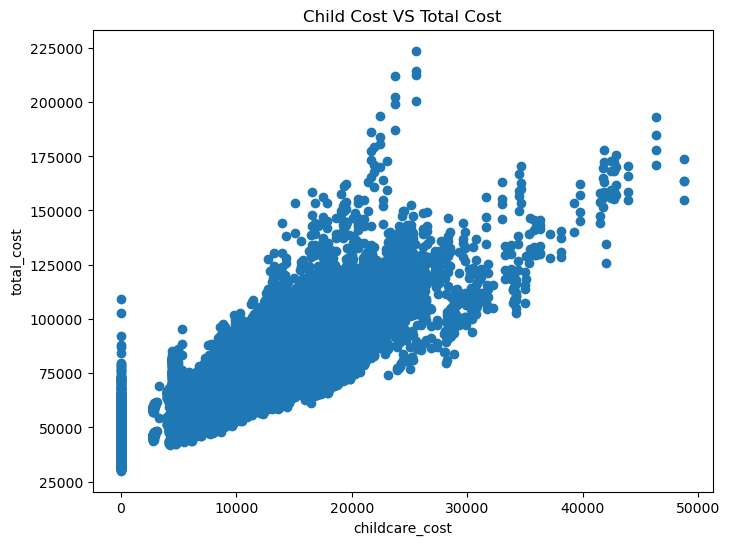

In [158]:
create_scatter_plot(data,"childcare_cost","total_cost","Child Cost VS Total Cost") # Highly Correlated

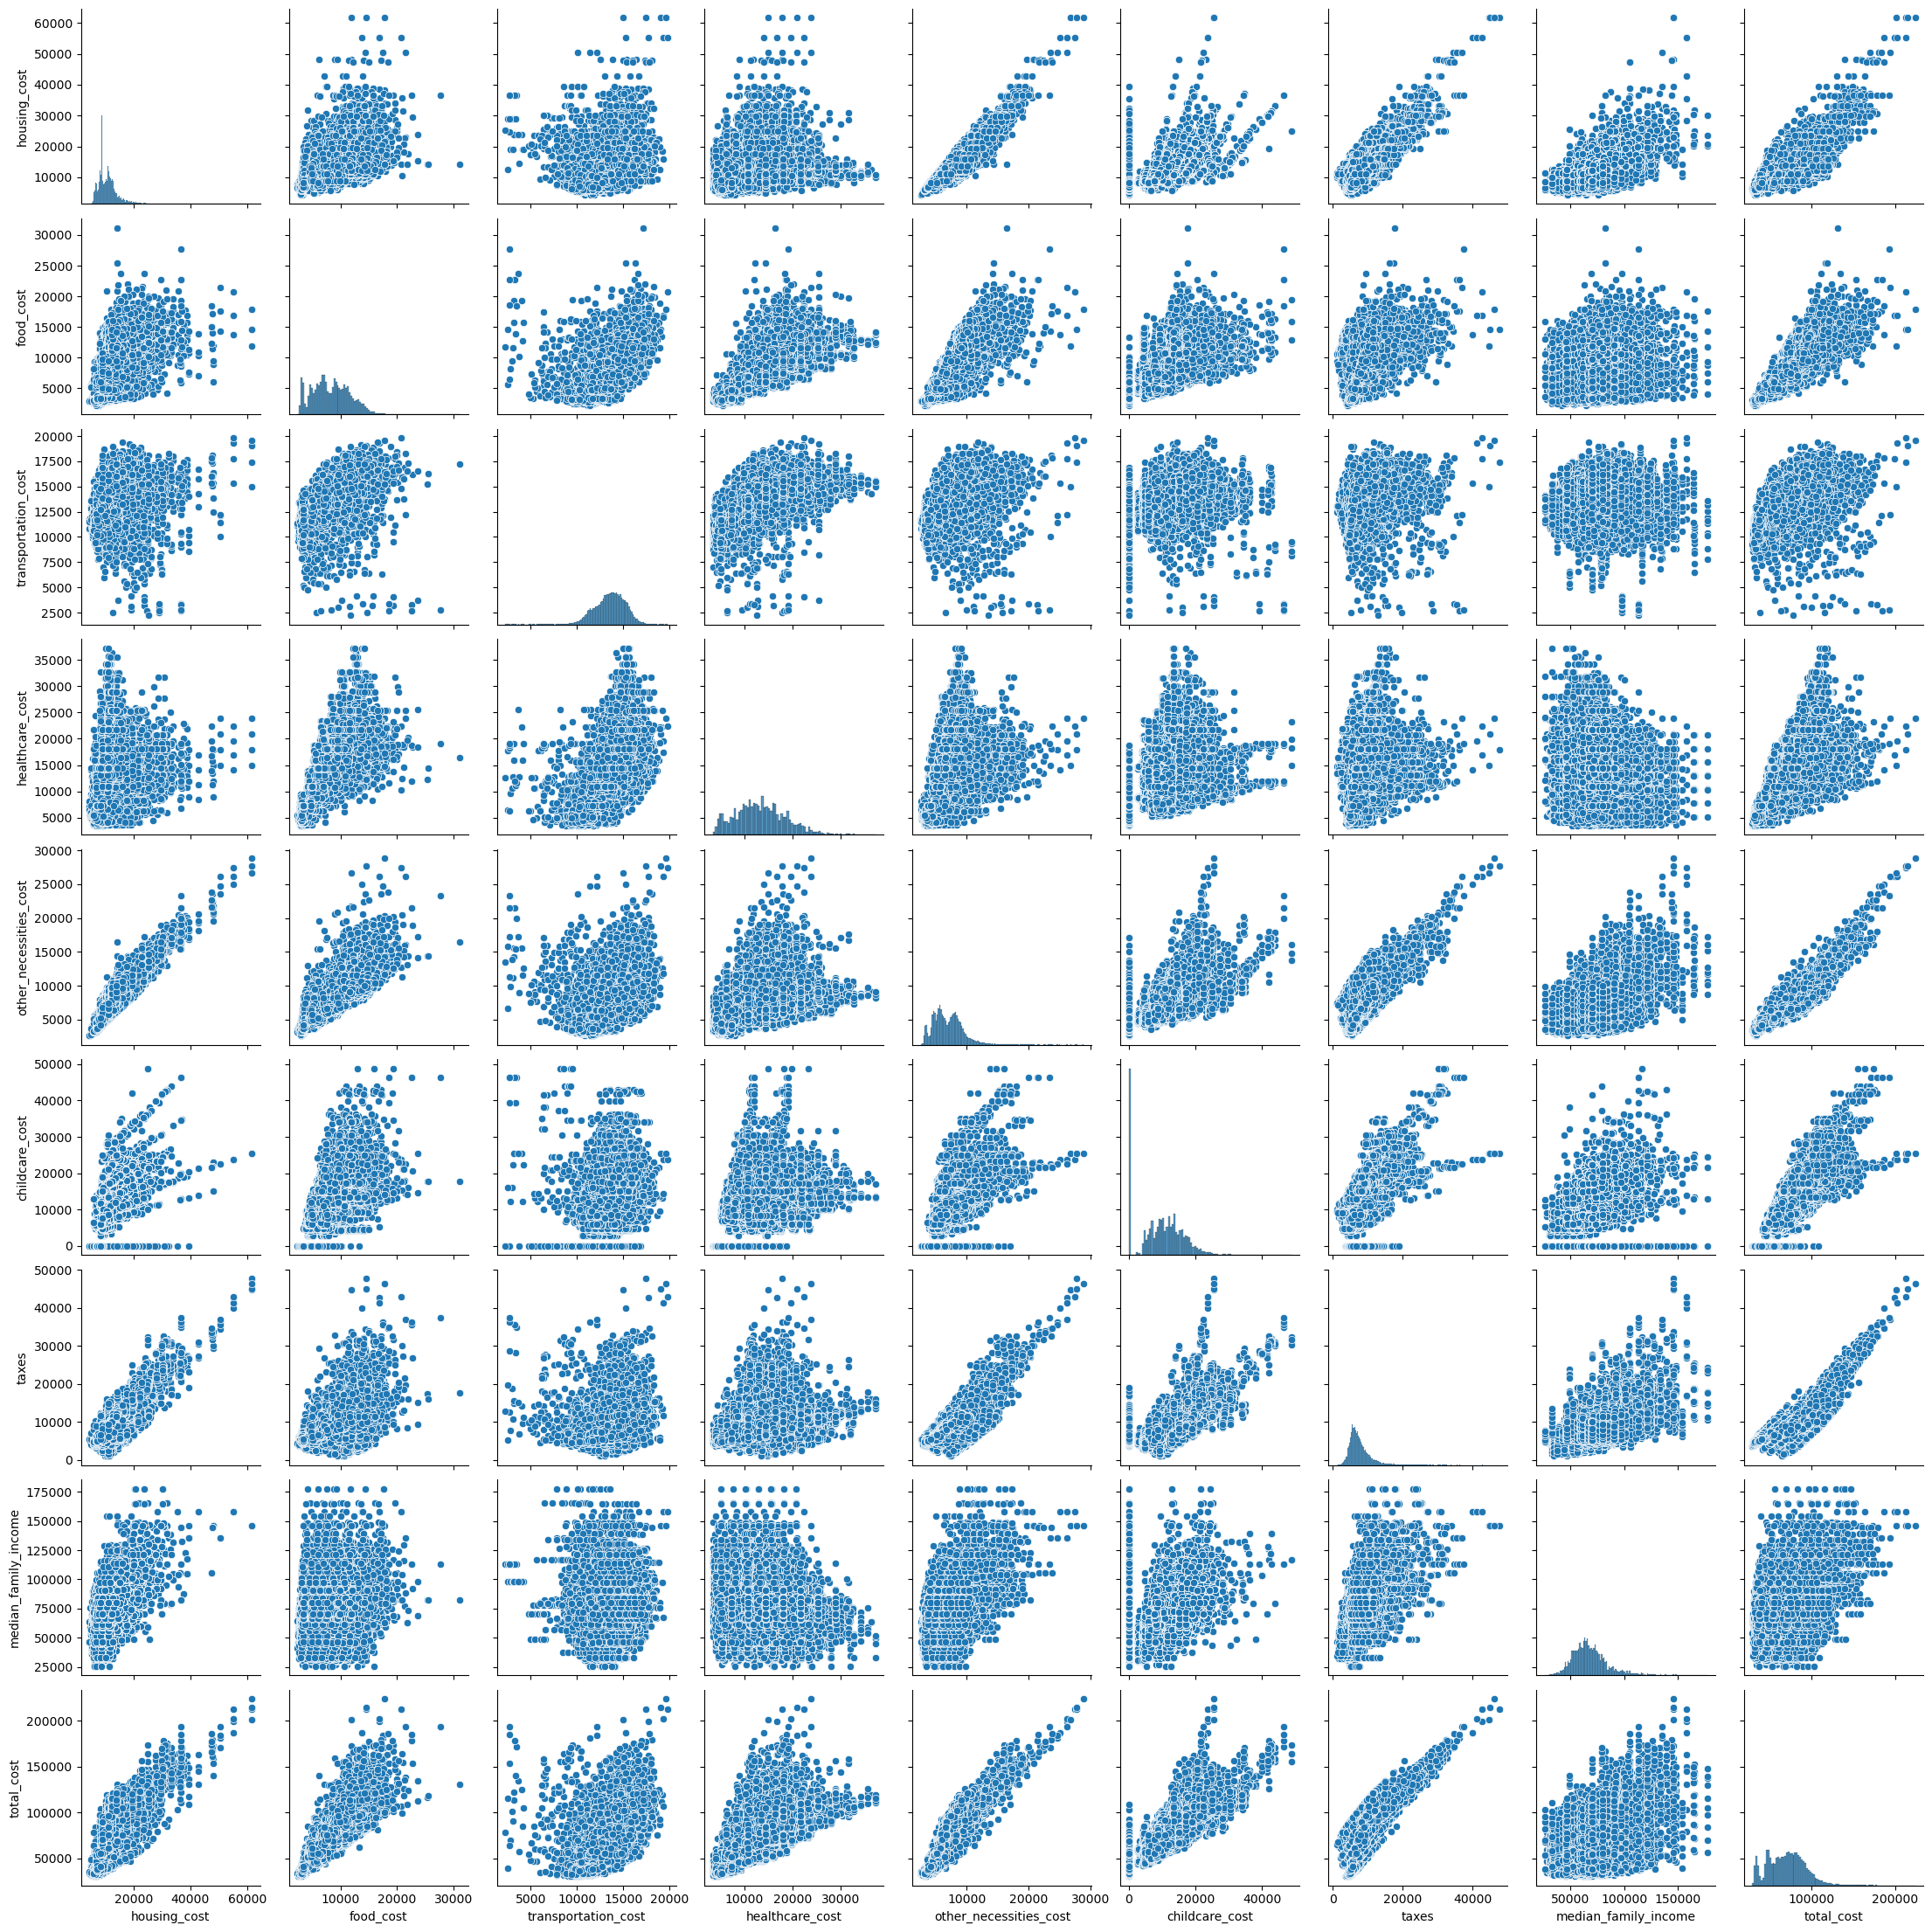

In [161]:
cost_numerical = data[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost','taxes','median_family_income','total_cost']]
# Checking Correlation for numerical columns
sns.pairplot(cost_numerical)

### 2. Heat Map

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the correlation matrix between numerical cost categories
def plot_cost_correlation(data, cost_numerical):
    """
    Plots a heatmap of the correlation matrix for numerical cost categories.

    This function computes the correlation between numerical columns in the given dataset
    and visualizes it using a heatmap.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        cost_numerical (list): A list of column names that represent numerical cost categories 
                               in the DataFrame for which the correlation should be calculated.
    """
    # Compute the correlation matrix
    cost_corr = cost_numerical.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10,6))
    mask = np.triu(np.ones_like(cost_corr))
    sns.heatmap(cost_corr, annot=True, cmap='YlGnBu', linewidths=0.5,mask=mask)
    
    # Set plot title and display the heatmap
    plt.title('Correlation Between Numerical Columns')
    plt.savefig("HeatMap_Correlation")
    plt.show()


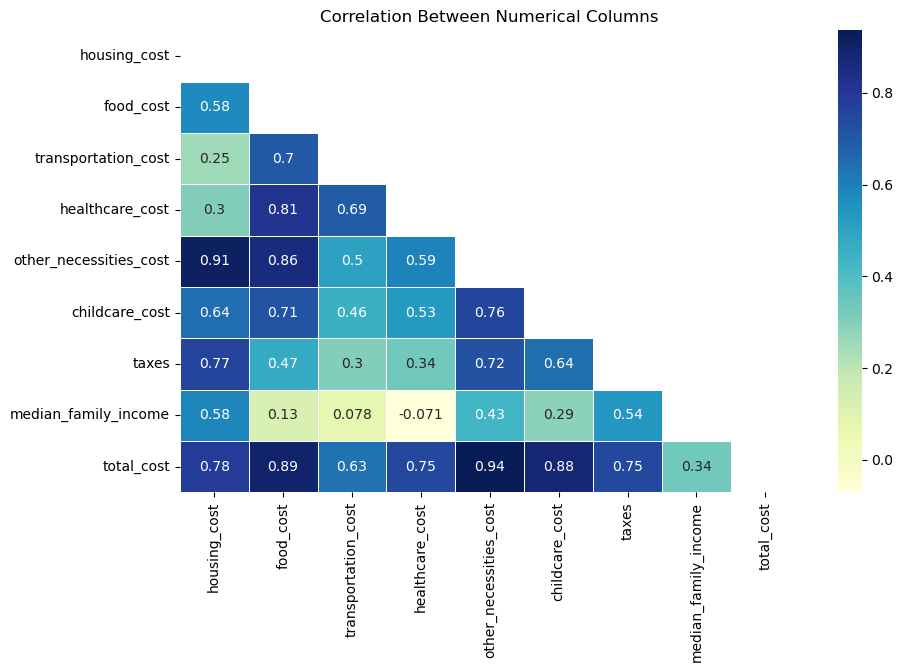

In [172]:
plot_cost_correlation(data,cost_numerical)

In [173]:
# Observations:

# Housing_cost, food_cost, other_necessities_cost and childcare_cost are strongly linked with each other and have a significant impact on total_cost.
# Healthcare cost is positively correlated with other essential costs but not strongly with Median_family_income.
# Median_family_income has weak correlated with total_cost

### Statistical Summary - Moments

#### Mean and Median

In [178]:
print("Mean of each Numerical Column in Dataset:")
print(f"{cost_numerical.mean()}\n")
print("Median of each Numerical Column in Dataset:")
print(f"{cost_numerical.median()}")

Mean of each Numerical Column in Dataset:
housing_cost              11073.673539
food_cost                  8287.504557
transportation_cost       13593.856381
healthcare_cost           13394.031748
other_necessities_cost     7015.318377
childcare_cost             9879.584233
taxes                      7657.714782
median_family_income      68315.246017
total_cost                70901.683601
dtype: float64

Median of each Numerical Column in Dataset:
housing_cost              10416.000000
food_cost                  8129.156280
transportation_cost       13698.164400
healthcare_cost           13082.700000
other_necessities_cost     6733.056120
childcare_cost            10166.340120
taxes                      6898.468860
median_family_income      65955.605469
total_cost                70977.682800
dtype: float64


#### Standard Deviation

In [181]:
print(f"Standard Deviation of each Numerical column in Dataset:")
print(cost_numerical.std())

Standard Deviation of each Numerical column in Dataset:
housing_cost               4165.606147
food_cost                  3271.140249
transportation_cost        1640.456562
healthcare_cost            5204.545710
other_necessities_cost     2397.415490
childcare_cost             6778.223399
taxes                      3339.795571
median_family_income      16884.335983
total_cost                21846.545235
dtype: float64


#### Skewness and Kurtosis

In [184]:
print("Kurtosis of each Numerical Column in Dataset")
print(f"{cost_numerical.kurt()}\n")
print("Skewness of each Numerical Column in Dataset")
print(f"{cost_numerical.skew()}")

Kurtosis of each Numerical Column in Dataset
housing_cost              13.414382
food_cost                 -0.325410
transportation_cost        1.174652
healthcare_cost            0.102927
other_necessities_cost     3.750203
childcare_cost             0.422628
taxes                     12.880220
median_family_income       3.432626
total_cost                 0.787174
dtype: float64

Skewness of each Numerical Column in Dataset
housing_cost              2.574805
food_cost                 0.317358
transportation_cost      -0.470893
healthcare_cost           0.445990
other_necessities_cost    1.165826
childcare_cost            0.302132
taxes                     2.602357
median_family_income      1.269201
total_cost                0.483242
dtype: float64


In [186]:
# Observation:
# Kurtosis: High kurtosis in housing cost and taxes indicates heavy tails and outliers. 
#             Food cost and healthcare cost have low kurtosis, suggesting more even distributions.
# Skewness: Housing cost and taxes are right-skewed, with most values lower and a few high-cost outliers. 
#             Transportation cost is slightly left-skewed, while food, healthcare, and childcare costs are nearly symmetric.

### 3. Box Plot and Skewness Distribution (Histogram with KDE)

In [189]:
# Box Plot – Helps detect outliers and spread of data
# Histogram + KDE Curve – Shows skewness and distribution shape

In [193]:
def plot_all_cost_boxes(data):
    """
    Creates a single figure containing box plots for each specified numerical cost category.

    Args:
        data (pd.DataFrame): The DataFrame containing the data with numerical columns.

    """
    # Creating the combined box plot
    plt.figure(figsize=(14, 8))
    sns.boxplot(data)
    plt.title("Box Plots of Numerical Data")
    plt.xlabel("Cost Category")
    plt.ylabel("Value")
    plt.savefig("Box_Plot_Numerical_columns.png")
    plt.tight_layout()
    plt.show()


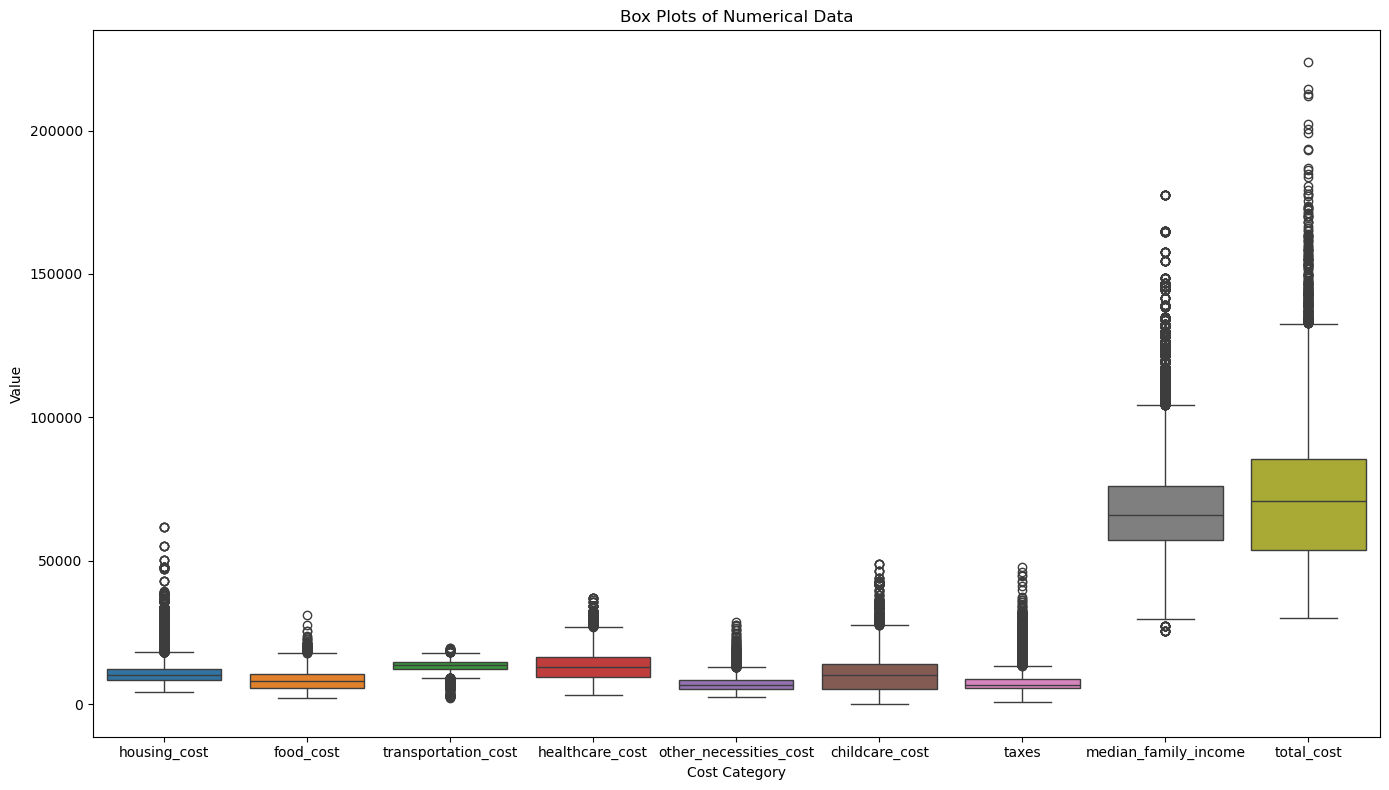

In [195]:
plot_all_cost_boxes(cost_numerical)

In [88]:
def plot_cost_distribution(data, col):
    """
    Creates a histogram with KDE for a given numerical cost category.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        col (str): The column name of the numerical cost category to plot.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution & Skewness of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


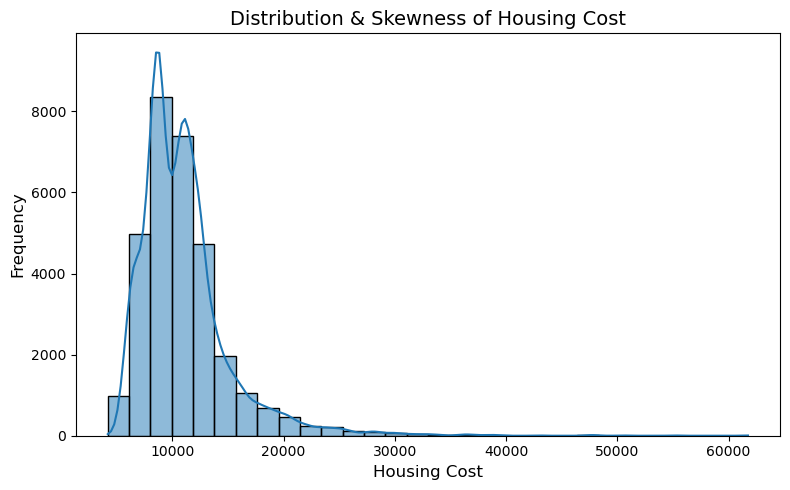

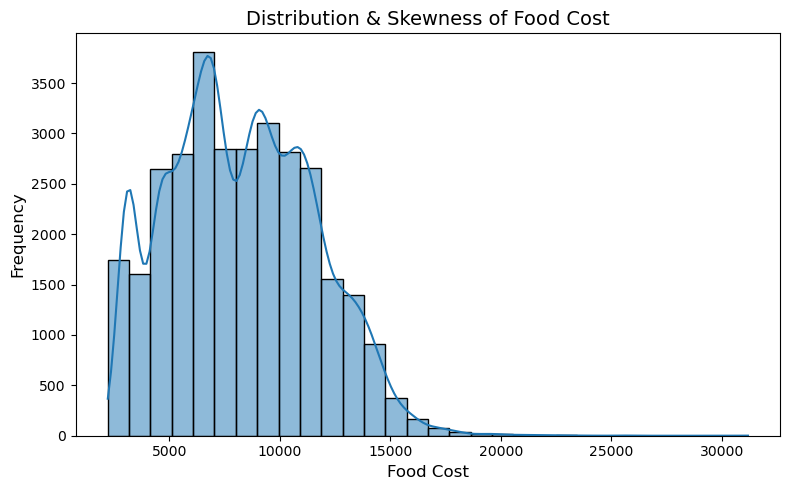

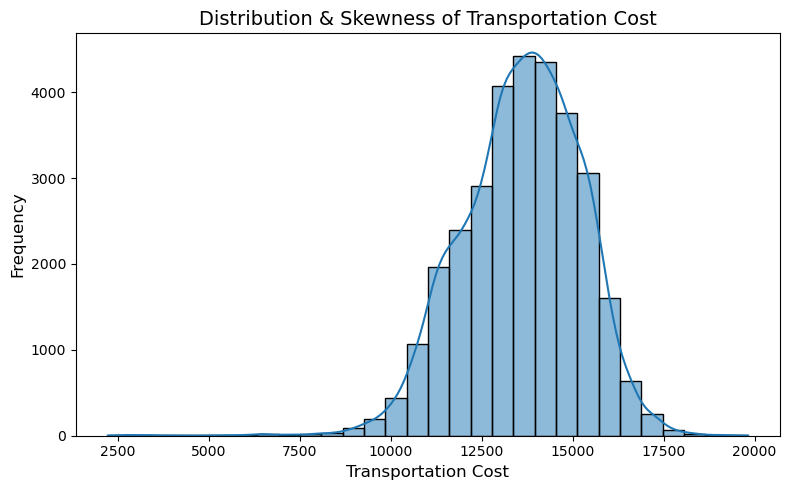

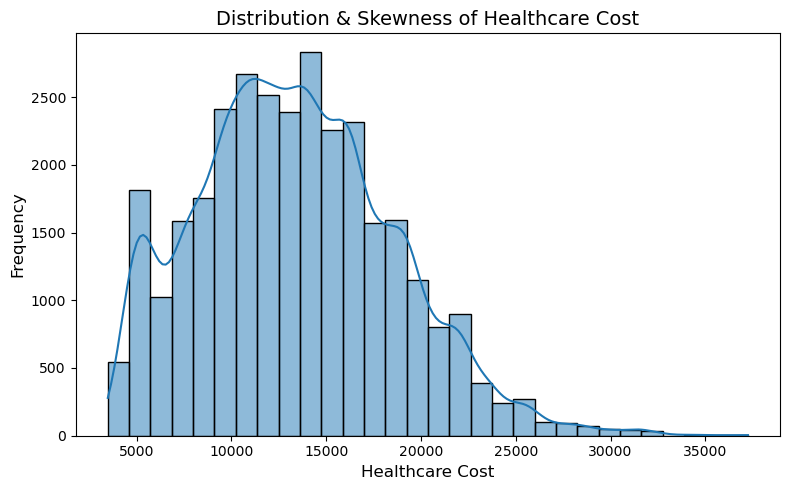

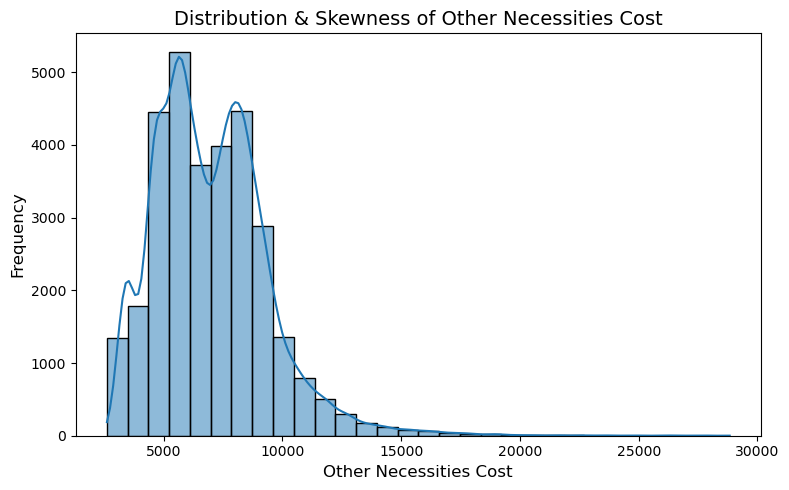

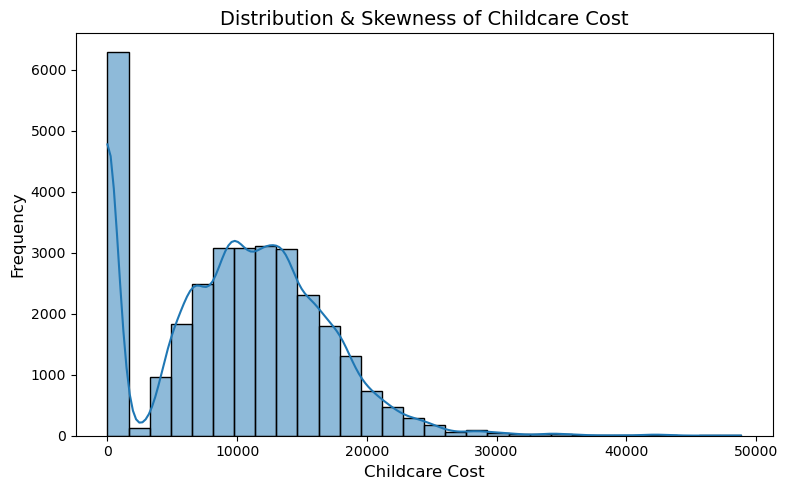

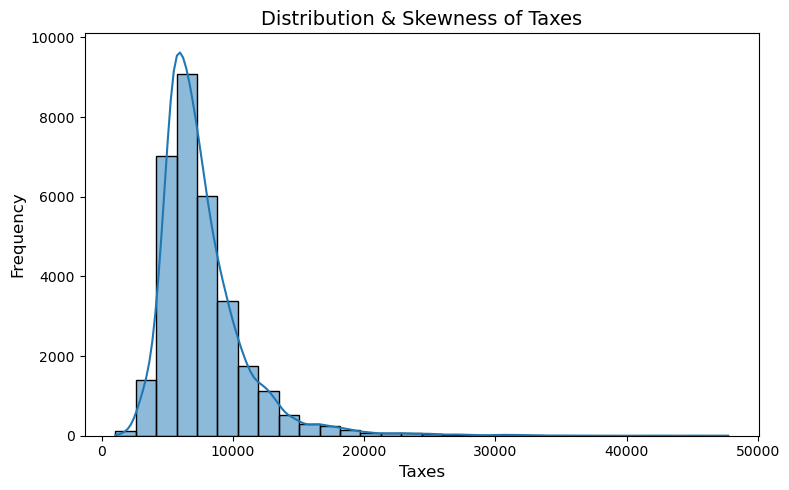

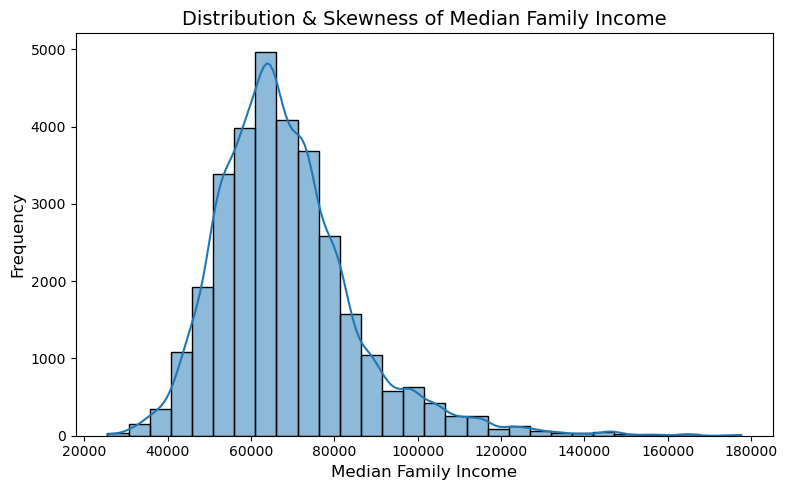

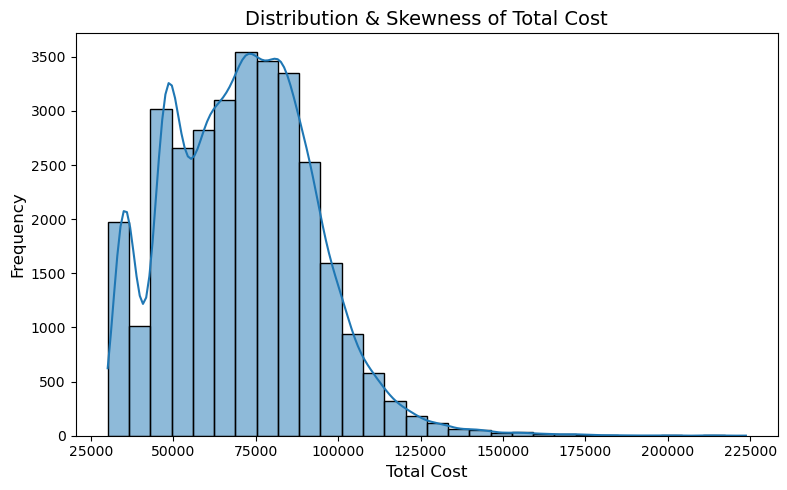

In [90]:
for col in cost_numerical:
    plot_cost_distribution(data, col)

In [91]:
#The majority of the columns exhibit a right-skewed distribution,
# meaning that most of the data is concentrated on the left side, with outliers on the right.

###  Analysis of Living Costs by Various Factors (Categorical Features)

#### 4. BAR PLOT

In [213]:
# Function to plot Average Total Cost by State
def plot_state_costs(data):
    """
    Plots the average total cost by state.

    This function groups the data by 'state', calculates the average 'total_cost' for each state, 
    and displays the results as a bar chart.

    parameter : data (Data Frame)
    """
    state_costs = data.groupby('state')['total_cost'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    state_costs.plot(kind='bar', color='skyblue')
    plt.title('Average Total Cost by State')
    plt.xlabel('State')
    plt.ylabel('Average Total Cost')
    plt.xticks(rotation=90)
     plt.savefig("Average_Total_Cost_by_State.png")
    plt.show()

# Function to plot Average Total Cost by Family Member Count
def plot_family_size_costs(data):
    """
    Plots the average total cost by family member count.

    This function groups the data by 'family_member_count', calculates the average 'total_cost' 
    for each family size, and displays the results as a bar chart.

    parameter : data (Data Frame)
    """
    family_size_costs = data.groupby('family_member_count')['total_cost'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    family_size_costs.plot(kind='bar', color='lightgreen')
    plt.title('Average Total Cost by Family Member Count')
    plt.xlabel('Family Member Count')
    plt.ylabel('Average Total Cost')
    plt.xticks(rotation=90)
     plt.savefig("Average_Total_Cost_by_familysize.png")
    plt.show()

# Function to compare Metro vs Non-Metro Area Costs
def plot_metro_vs_non_metro(data):
    """
    Compares the average total cost between metro and non-metro areas.

    This function groups the data by 'isMetro', calculates the average 'total_cost' for metro and 
    non-metro areas, and displays the results as a bar chart.

    parameter : data (Data Frame)
    """
    metro_costs = data.groupby('isMetro')['total_cost'].mean()
    plt.figure(figsize=(8,6))
    metro_costs.plot(kind='bar', color=['lightblue', 'orange'])
    plt.title('Average Total Cost: Metro vs Non-Metro Areas')
    plt.xlabel('Metro Area')
    plt.ylabel('Average Total Cost')
    plt.xticks(rotation=0)
    plt.savefig("Average_Total_Cost_by_Ismetro.png")
    plt.show()

# Function to plot the top 10 regions by cost (based on county/area name)
def plot_region_costs(data):
    """
    Plots the average total cost for the top 10 counties/regions.

    This function groups the data by 'county', calculates the average 'total_cost' for each county, 
    sorts the values, and displays the top 10 regions as a bar chart.

    parameter : data (Data Frame)
    """
    region_costs = data.groupby('county')['total_cost'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    region_costs.plot(kind='bar', color='lightcoral')
    plt.title('Average Total Cost by County/Region')
    plt.xlabel('County')
    plt.ylabel('Average Total Cost')
    plt.xticks(rotation=90)
    plt.savefig("Average_Total_Cost_by_region.png")
    plt.show()


IndentationError: unexpected indent (622524556.py, line 18)

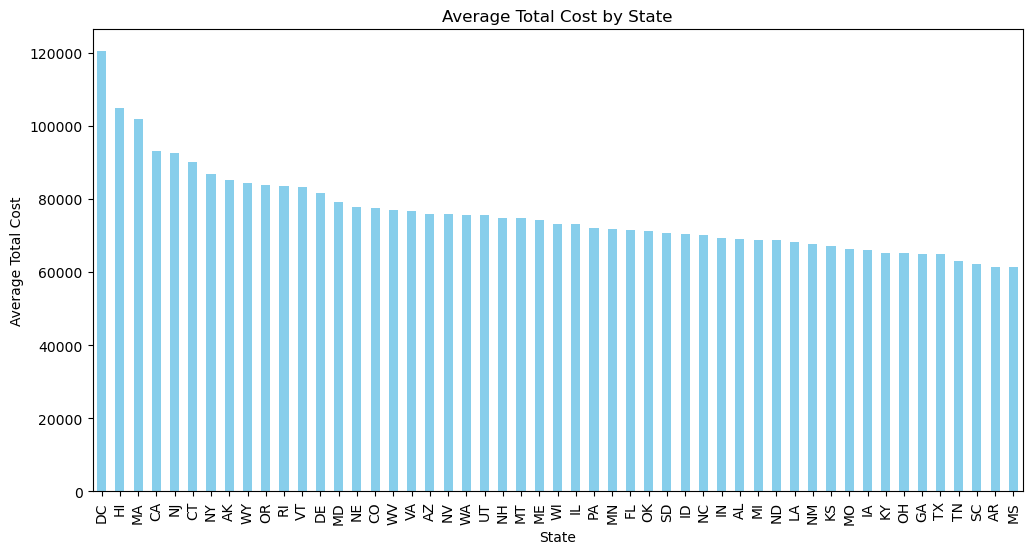

In [215]:
# Plot total cost by state
plot_state_costs(data)

In [217]:
# The data shows that high-cost states such as DC, Hawaii, Massachusetts, California, and New Jersey have the highest average total living costs, 
# likely due to expensive housing, high taxes, and elevated living expenses in major urban areas. In contrast, lower-cost states like Mississippi,
# Arkansas, South Carolina, Tennessee, and Texas have significantly lower living costs, influenced by more affordable housing and lower overall expenses.

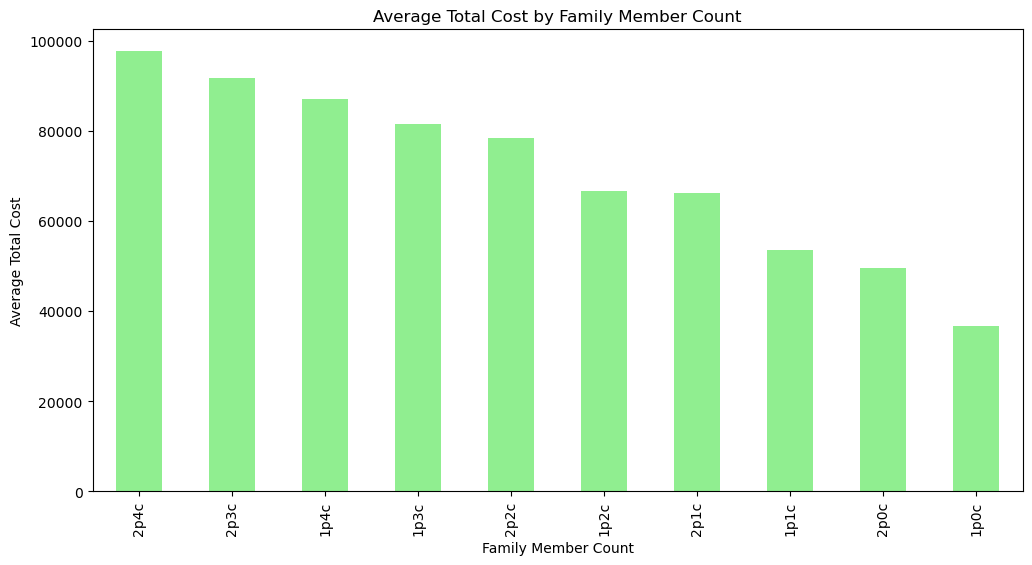

In [219]:
# Plot total cost by family member count
plot_family_size_costs(data)

In [221]:
# The data shows that families with more members tend to have higher total living costs.
# family structures like 2 parents and 4 children (2p4c) and 2 parents and 3 children (2p3c) have the highest costs
# On the other hand, smaller families or single-parent households with fewer children, 
# such as 1 parent and 1 child (1p1c) or 2 parents and no children (2p0c), experience significantly lower costs. 
# The general trend indicates that the more family members, especially children, the higher the living expenses.

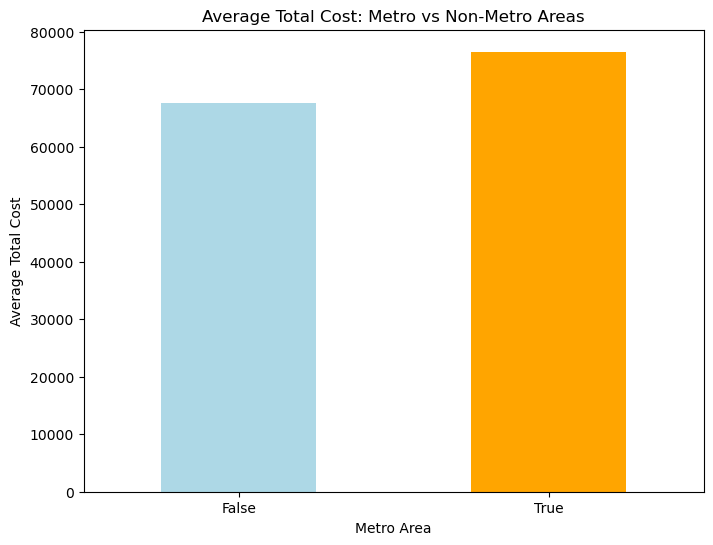

In [223]:
# Compare metro vs non-metro area costs
plot_metro_vs_non_metro(data)

In [225]:
# The metro areas have a higher average total cost of living compared to non-metro areas.

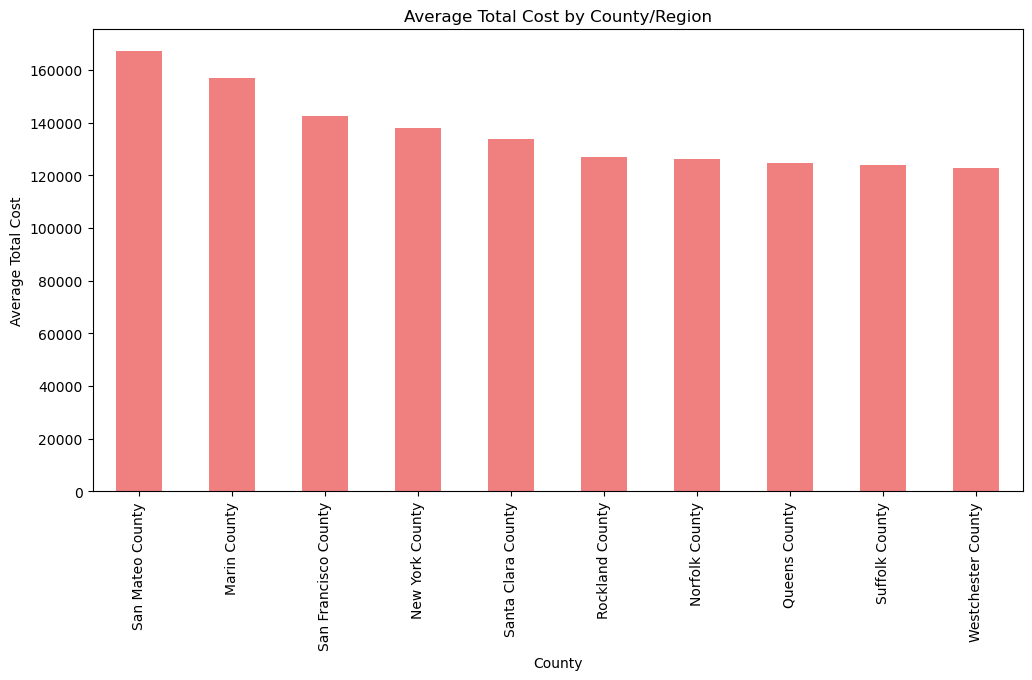

In [227]:
# Plot the top 10 regions by cost
plot_region_costs(data)

In [228]:
# Observations:
# San Mateo, Marin, and San Francisco have the highest Average costs, matching their extremely high living expenses.
# New York County (Manhattan) is slightly lower but remains one of the most expensive areas. 
# Queens, Suffolk, and Westchester are more affordable than Manhattan and Silicon Valley but still costly.
# The Bay Area (San Mateo, Santa Clara, Marin) leads in high expenses.

In [237]:
# Function to plot the family size vs cost categories (stacked bar chart)
def plot_cost_by_family_size(data):
    """
    Plots the average breakdown of costs by family size.

    This function groups the data by 'family_member_count' and calculates the average of 
    specified cost nemurical columns for each family size. The result is displayed as a stacked 
    bar chart, showing the contribution of each cost category to the total average cost.

    Parameters:
    - data (DataFrame)
    """
    cost_categories = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 
                       'other_necessities_cost', 'childcare_cost']
    cost_by_family_size = data.groupby('family_member_count')[cost_categories].mean()
    cost_by_family_size.plot(kind='bar', stacked=True, figsize=(12,6), color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
    plt.title('Average Breakdown of Costs by Family Size')
    plt.xlabel('Family Member Count')
    plt.ylabel('Average Cost')
    plt.xticks(rotation=90)
    plt.savefig("Average_Breakdown_of_Costs_by_Family_Size.png")
    plt.show()


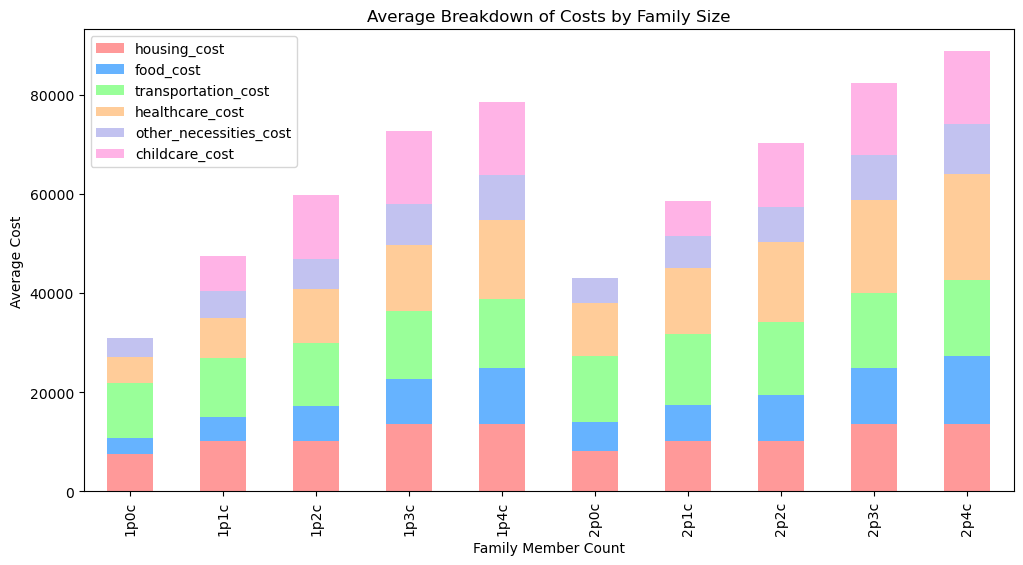

In [239]:
# Plot the family size vs cost categories
plot_cost_by_family_size(data)

In [105]:
# As family size increases, total costs rise, especially for food, transportation, and childcare.
# Housing costs may remain stable or grow moderately, while childcare becomes a major expense for families with young children.
# The proportion of each cost category shifts as the family grows.

In [106]:
# Calculate affordability ratio
data['affordability_ratio'] = (data['total_cost'] / data['median_family_income']) * 100

# Group by state and calculate the average affordability ratio
state_affordability = data.groupby('state')['affordability_ratio'].mean().reset_index()

# Sort states by affordability ratio (ascending: more affordable, descending: less affordable)
state_affordability = state_affordability.sort_values(by='affordability_ratio')

state_affordability

,state,affordability_ratio
39,RI,83.538656
28,ND,84.937101
30,NH,84.950401
20,MD,85.043449
6,CT,87.683411
12,IA,89.456678
23,MN,91.763706
31,NJ,91.920837
35,OH,93.693157
15,IN,99.347549


In [241]:
# Identify the most and least affordable states
most_affordable = state_affordability.iloc[0]
least_affordable = state_affordability.iloc[-1]

print(f"Most Affordable State: {most_affordable['state']} ({most_affordable['affordability_ratio']:.2f}%)")
print(f"Least Affordable State: {least_affordable['state']} ({least_affordable['affordability_ratio']:.2f}%)")


Most Affordable State: RI (83.54%)
Least Affordable State: WV (134.75%)


In [247]:
def affordable_state(data):
    """
    This function visualizes the top 10 most affordable states based on the cost-to-income ratio
    in a horizontal bar chart. The chart shows the affordability ratio, which represents how 
    affordable each state is based on the total cost relative to the median family income.

    Parameters:
    -----------
    data : pd.DataFrame
    """
    plt.figure(figsize=(12,6))
    sns.barplot(x='affordability_ratio', y='state', data=data.head(10), palette='coolwarm',hue='state')
    plt.xlabel('Total_Cost-to-Income Ratio (%)')
    plt.ylabel('State')
    plt.title('Top 10 Affordability of States Based on Income Ratio')
    plt.legend()
    plt.savefig("Top_10_Affordability_of_States_Based_on_Income Ratio")
    plt.show()
        

C:\Users\Shiri\AppData\Local\Temp\ipykernel_9664\2681727182.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


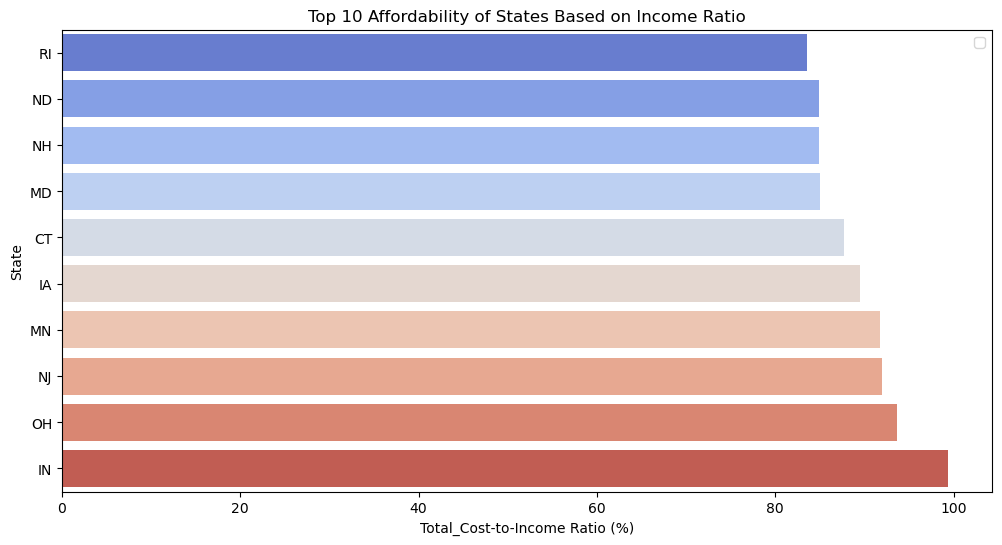

In [249]:
affordable_state(state_affordability)

In [251]:
# Add a column for savings
data['savings'] = data['median_family_income'] - data['total_cost']

### 5. Pie Chart

In [253]:
## Function to plot pie charts for average costs in Metro and Non-Metro areas
def plot_cost_category_pie_charts(df):
    """
    Plots pie charts showing the average cost breakdown for various categories 
    for Metro and Non-Metro areas separately.
    
    Parameters:
    data (DataFrame): The input DataFrame containing cost data along with the 'isMetro' column to indicate metro or non-metro areas.

    """
    # Calculate average cost for each category based on Metro and Non-Metro
    metro_avg_cost = df[df['isMetro'] == True][['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 
                                                         'other_necessities_cost', 'childcare_cost', 'taxes']].mean()
    non_metro_avg_cost = df[df['isMetro'] == False][['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 
                                                         'other_necessities_cost', 'childcare_cost', 'taxes']].mean()

    # Plotting the pie chart for Metro
    plt.figure(figsize=(8,8))
    plt.pie(metro_avg_cost, labels=metro_avg_cost.index, autopct='%1.1f%%', startangle=140,
            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666'])
    plt.title('Average Cost of Living Categories in Metro Area')
    plt.axis('equal')  # Ensures the pie chart is circular
    plt.savefig("Pie_Metro")
    plt.show()

    # Plotting the pie chart for Non-Metro
    plt.figure(figsize=(8,8))
    plt.pie(non_metro_avg_cost, labels=non_metro_avg_cost.index, autopct='%1.1f%%', startangle=140,
            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666'])
    plt.title('Average Cost of Living Categories in Non-Metro Area')
    plt.axis('equal')  # Ensures the pie chart is circular
    plt.savefig("Pie_Non_Metro")

    plt.show()




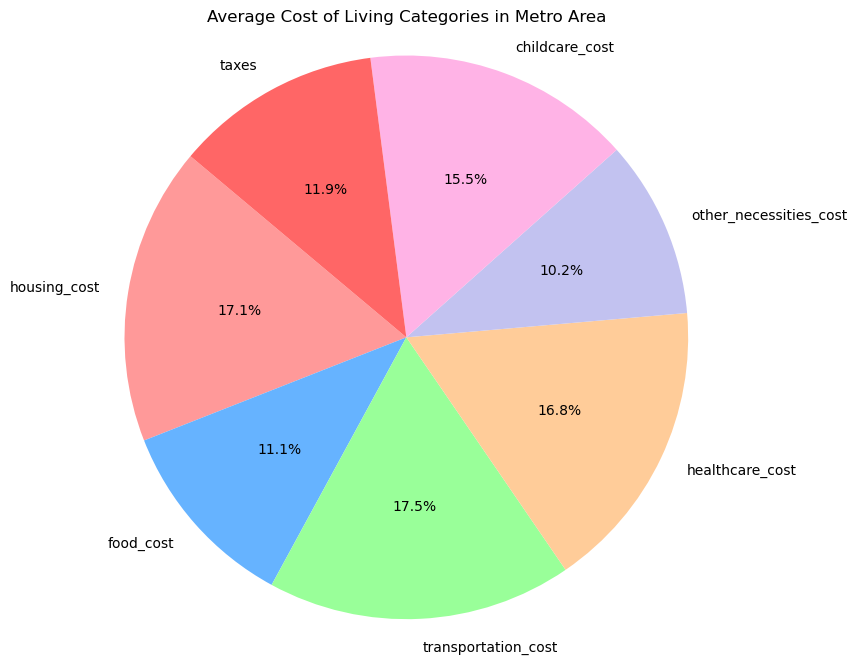

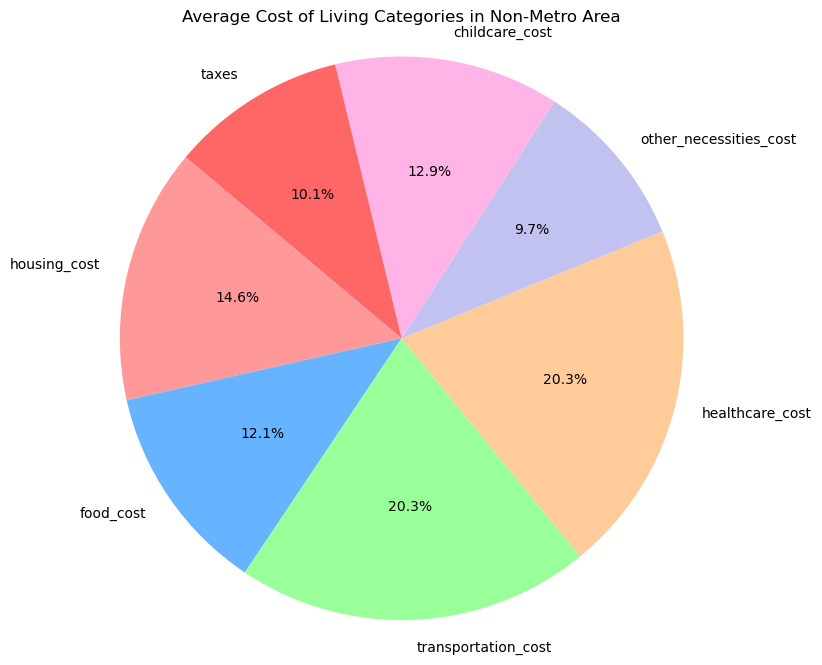

In [255]:
# Call the function to plot the pie charts
plot_cost_category_pie_charts(data)

In [256]:
# Grouping by family size and metro area
grouped = data.groupby(['family_member_count', 'isMetro'])[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 
                                                         'other_necessities_cost', 'childcare_cost', 'taxes']].sum()

# Function to plot pie chart for family size and metro area
def plot_pie_chart_for_family_size_and_area(grouped_data, family_size, is_metro):
    """
    Plots a pie chart showing the cost breakdown for a specific family size and area (Metro or Non-Metro).
    
    Parameters:
    grouped_data (DataFrame): The grouped DataFrame containing the sum of costs by family size and metro area.
    family_size (str): The family size (e.g., '1p0c', '1p1c', etc.) for which to plot the pie chart.
    is_metro (bool): Boolean value indicating whether the area is metro (True) or non-metro (False).
    
    """
    cost_data = grouped_data.loc[(family_size, is_metro)]
    cost_data = cost_data / cost_data.sum() * 100  # Normalize to percentage

    plt.figure(figsize=(8,8))
    plt.pie(cost_data, labels=cost_data.index, autopct='%1.1f%%', startangle=140, 
            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ffccff'])
    plt.title(f'Cost Breakdown for Family Size: {family_size}, Area: {"Metro" if is_metro else "Non-Metro"}')
    plt.axis('equal')  # Ensures the pie chart is circular
    plt.show()


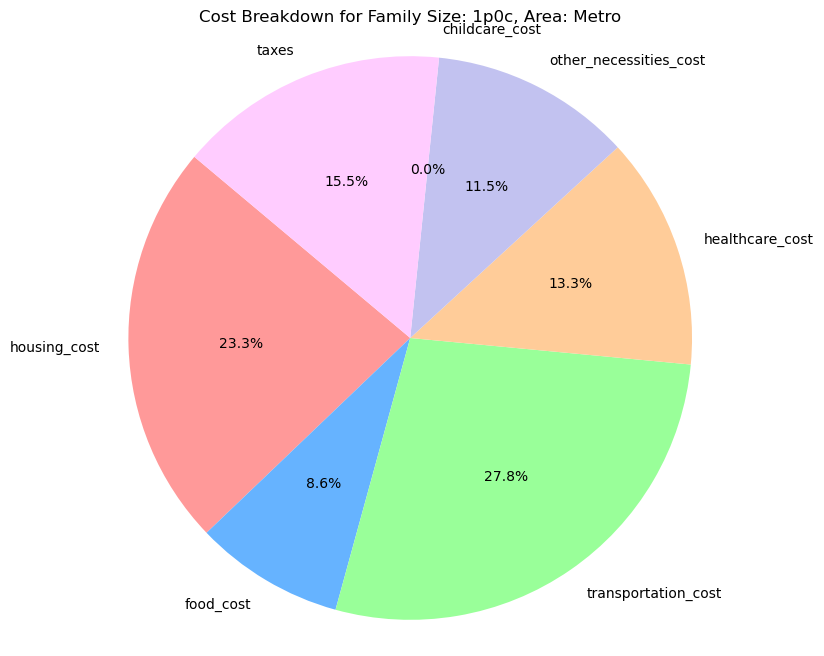

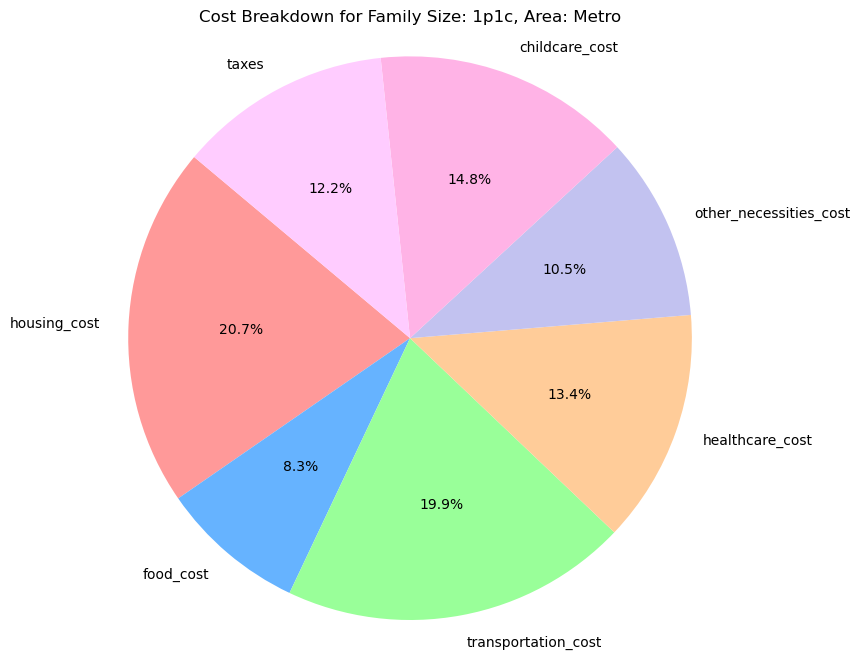

In [259]:
# Plotting pie charts for family sizes IPC ('1p0c') and Next ('1p1c') for metro areas (True)
plot_pie_chart_for_family_size_and_area(grouped, '1p0c', True)  # 1p0c - 1 person, 0 children
plot_pie_chart_for_family_size_and_area(grouped, '1p1c', True)  # 1p1c - 1 person, 1 child

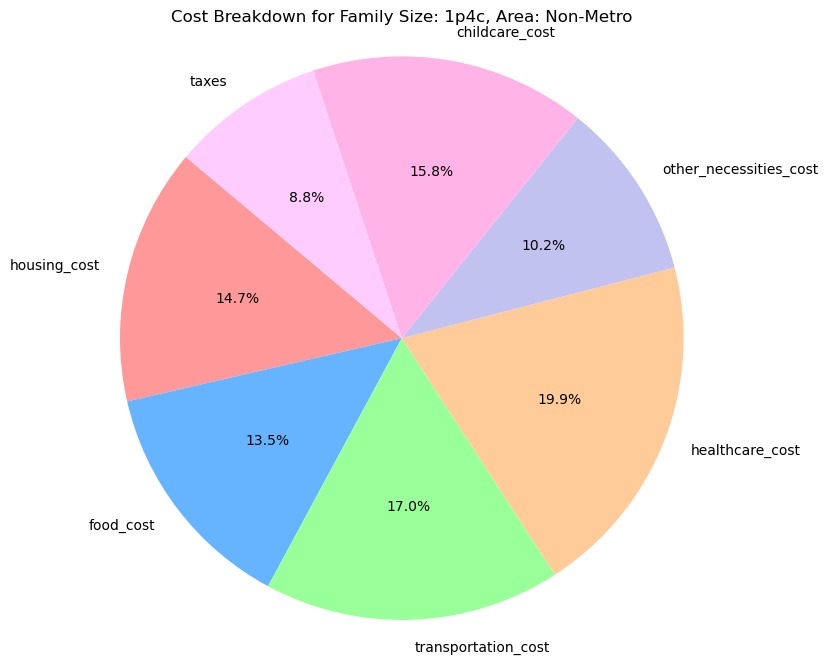

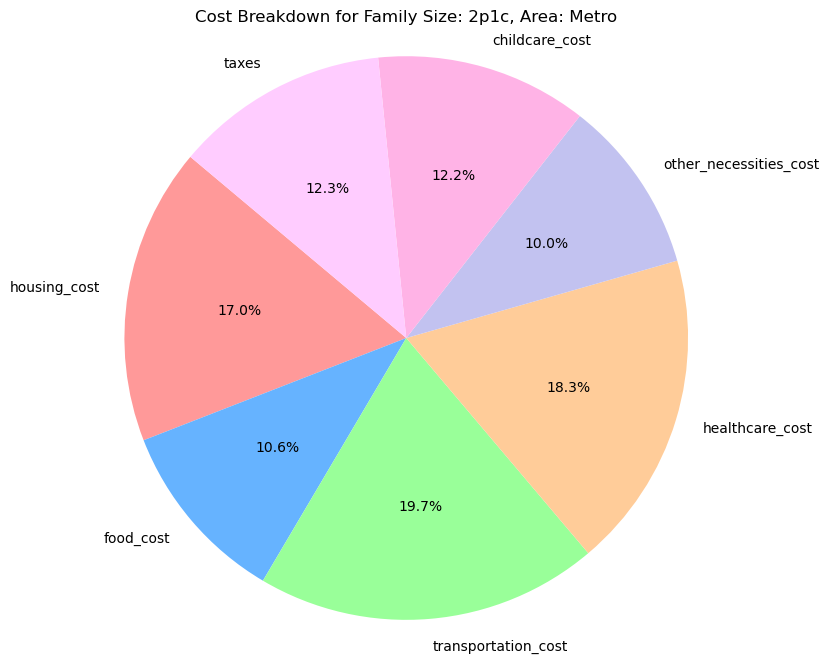

In [261]:
plot_pie_chart_for_family_size_and_area(grouped, '1p4c', False)  # 1p0c - 1 person, 0 children
plot_pie_chart_for_family_size_and_area(grouped, '2p1c', True)  # 1p1c - 1 person, 1 child

## Conclusion: 
Living costs vary significantly based on location, family size, and metro status. 
High-cost states and metro areas experience elevated expenses, especially in housing and childcare, 
while smaller families and non-metro regions have lower financial burdens. 
As family size grows, costs for essentials like food and childcare increase, 
making affordability a key factor in financial planning.